# 這是一份 play store 的程式統計資料
如圖，各欄位依序為：<br/>
    程式名稱，程式類型，評分，回饋，檔案大小，下載數，付費類型，價格，適合對象，程式題材，最近更新日期，當前版本，系統要求
[來源連結](https://www.kaggle.com/lava18/google-play-store-apps) <https://www.kaggle.com/lava18/google-play-store-apps>

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

app_data = pd.read_csv('./googleplaystore.csv')
app_data = app_data[ app_data['Category']!='1.9' ]
app_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


# 以下是這份資料的簡單數值大綱
依據各類別列出
* 各類別數量
* 各類別平均評比
* 各類別平均回饋數
* 各類別平均下載數
從這份清單可以簡單看出以下幾點
* 在各類型中以 FAMILY 和 GAME 類型的數量是最多的，可能表示這類別可能的發展最多元
* 在各類型中以 GAME 和 COMMUNICATION 下載數最多，可能表示這類別市場最大
* 在各類型中以 COMMUNICATION 和 SOCIAL 回饋數最多，可能表示這類的使用對象比較有想法，可能比較適合常世新挑戰新事物
* 面對一個新用戶，也比較能透過下載數和評比來推薦項目

In [2]:
category = app_data['Category'].value_counts().to_frame().reset_index().rename(columns = {'Category':'Count', 'index':'Category'})
ratings = app_data[['Category', 'Rating']].groupby('Category').mean().reset_index()

# there is a problem with mean() for unknown reason
reviews = app_data[['Category', 'Reviews']]
for idx, row in reviews.iterrows():
    row['Reviews'] = int(row['Reviews'])
reviews = reviews.groupby('Category').agg({'Reviews':'sum'}).reset_index()

# there is a problem with mean() for unknown reason
installs = app_data[['Category', 'Installs']]
for idx, row in installs.iterrows():
    row['Installs'] = row['Installs'].replace(',','').replace('+','')
    if row['Installs'].isnumeric():
        row['Installs'] = int(row['Installs'])
installs = installs.groupby('Category').sum()

result = pd.merge(left=category, right=ratings, on="Category")
result = pd.merge(left=result, right=reviews, on="Category")
result = pd.merge(left=result, right=installs, on="Category")
for idx, row in result.iterrows():
    if type(row['Installs']) == int:
        row['Installs'] = int(row['Installs'])/row['Count']
    row['Installs'] = int(row['Installs'])/row['Count']
df_result = result.set_index('Category').rename(columns = {'Rating':'avg Rating', 'Installs':'avg Installs', 'Reviews':'avg Reviews'})
df_result

,Count,avg Rating,avg Reviews,avg Installs
Category,,,,
FAMILY,1972,4.192272,410226330,10258263505
GAME,1144,4.286326,1585422349,35086024415
TOOLS,843,4.047411,273185044,11452771915
MEDICAL,463,4.189143,1585975,53257437
BUSINESS,460,4.121452,13954552,1001914865
PRODUCTIVITY,424,4.211396,114116975,14176091369
PERSONALIZATION,392,4.335987,89346140,2325494782
COMMUNICATION,387,4.158537,815462260,32647276251
SPORTS,384,4.223511,70830169,1751174498


# 以下是對各類別的市場趨向做視覺化
比較屬於在開發者或是研究者方面較相關的資訊

Text(0, 0.5, 'Categories')

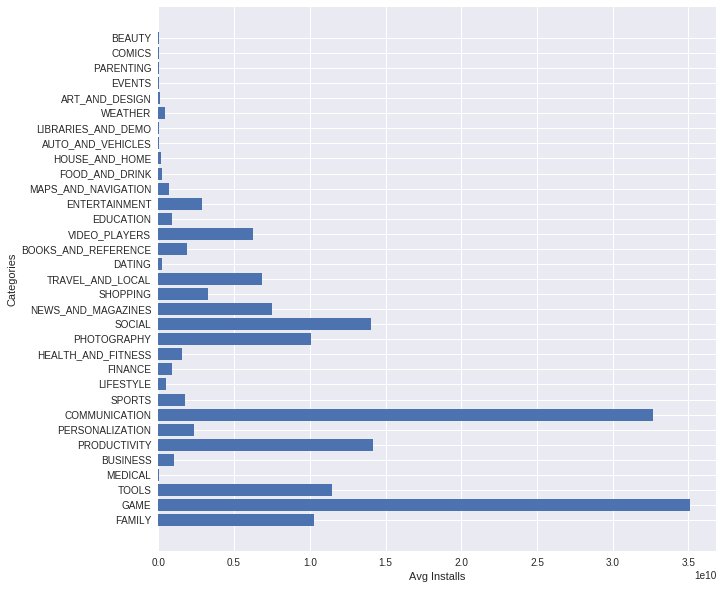

In [3]:
from matplotlib.pyplot import figure
figure(figsize=(10,10))

categories = list(df_result.index)
x = np.arange(1,len(categories)+1)
avg_installs = df_result['avg Installs'].values
plt.barh(y=x, width=avg_installs, tick_label=categories)
plt.xlabel('Avg Installs')
plt.ylabel('Categories')

# 以下是分析以上所選出的數值間的關聯性

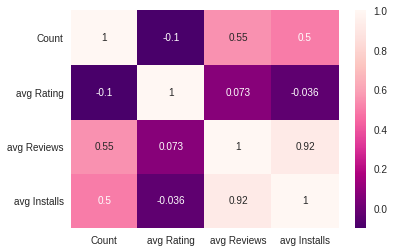

In [4]:
target = df_result.corr()
min_value = float(round(target.min().min(),2))
max_value = float(round(target.max().max(),2))
fig = sns.heatmap(target, annot=True, vmax=max_value, vmin=min_value, center=np.mean([max_value,min_value]), cmap='RdPu_r')
fig

# 付費是否比較好
許多用戶心中的疑惑，這裡按類型，透過平均評比來呈獻

In [5]:
paid_ratings = app_data[app_data['Type']!='Free'].groupby('Category')['Rating'].mean()
free_ratings = app_data[app_data['Type']=='Free'].groupby('Category')['Rating'].mean()
comp_ratings = pd.concat([paid_ratings, free_ratings], axis=1, sort=False)
comp_ratings.columns = ['Paid Ratings', 'Free Ratings']
print(comp_ratings[ comp_ratings['Paid Ratings']>comp_ratings['Free Ratings'] ].shape[0], '/32 in total are better')
comp_ratings

18 /32 in total are better


,Paid Ratings,Free Ratings
ART_AND_DESIGN,4.733333,4.338983
AUTO_AND_VEHICLES,4.600000,4.184722
BOOKS_AND_REFERENCE,4.275000,4.349412
BUSINESS,4.200000,4.118493
COMMUNICATION,4.063636,4.165359
DATING,3.625000,3.978010
EDUCATION,4.750000,4.379470
ENTERTAINMENT,4.600000,4.119728
EVENTS,NaN,4.435556
FAMILY,4.295062,4.181767


# 一個現實世界的產品維護周期
這或許是個比較無關緊要的數據，但列出來就是給還在學校就讀的我們看看
- 不同於我們所做過的作業或專案，在現實世界的產品維護周期是如何
- *周期愈長的產品數量愈少*

Text(0, 0.5, 'Number of App')

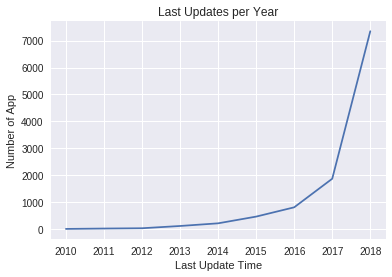

In [6]:
dates = app_data[['Category', 'Last Updated']]
for idx, row in dates.iterrows():
    row['Last Updated'] = int(row['Last Updated'].split(', ')[-1])
years = np.arange(min(dates['Last Updated']), max(dates['Last Updated'])+1)
all_data = dates['Last Updated'].values
count = []
for y in years:
    count.append( sum(all_data==y) )
# plt.bar(x=years, height=count)
plt.plot(years, count)
plt.title('Last Updates per Year')
plt.xlabel('Last Update Time')
plt.ylabel('Number of App')